## Classification: Predict whether the closing price of a stock index will increase or decrease on the next trading day, based on the opening price, highest price, lowest price, adjusted close price, and trading volume for each index?

### Data inspection using panadas

In [286]:
import pandas as pd

Loading the data into a data frame

In [287]:
# loading the data and placing in a dataframe
pricee_s_a = pd.read_csv('data/prices-split-adjusted.csv')
pricee_s_a

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


Looking at the number of data points for each symbol

In [288]:
#checking the number of datapoints for each symbol
pricee_s_a["symbol"].value_counts()

symbol
VTR     1762
VZ      1762
WAT     1762
WBA     1762
WDC     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

Checking the date data-type & null values

In [289]:
# checking the data summary
pricee_s_a.info()
# Checking for the missing values
print(
    f"Missing values: "
    f"date: {pricee_s_a['date'].isna().sum()}, "
    f"symbol: {pricee_s_a['symbol'].isna().sum()}, "
    f"open: {pricee_s_a['open'].isna().sum()}, "
    f"close: {pricee_s_a['close'].isna().sum()}, "
    f"low: {pricee_s_a['low'].isna().sum()}, "
    f"high: {pricee_s_a['high'].isna().sum()}", 
    f"volume: {pricee_s_a['volume'].isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB
Missing values: date: 0, symbol: 0, open: 0, close: 0, low: 0, high: 0 volume: 0


There are no missing values

Cheking the unique stock indexes or symbols.

In [290]:
# Cheking the unique stock indexes or symbols, their number and listing them
unique_sympols = pricee_s_a["symbol"].unique()
len (unique_sympols)

501

In [291]:
unique_sympols.tolist()

['WLTW',
 'A',
 'AAL',
 'AAP',
 'AAPL',
 'ABC',
 'ABT',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADS',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AET',
 'AFL',
 'AGN',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALK',
 'ALL',
 'ALXN',
 'AMAT',
 'AME',
 'AMG',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'AN',
 'ANTM',
 'AON',
 'APA',
 'APC',
 'APD',
 'APH',
 'ARNC',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AYI',
 'AZO',
 'BA',
 'BAC',
 'BAX',
 'BBBY',
 'BBT',
 'BBY',
 'BCR',
 'BDX',
 'BEN',
 'BHI',
 'BIIB',
 'BK',
 'BLK',
 'BLL',
 'BMY',
 'BSX',
 'BWA',
 'BXP',
 'C',
 'CA',
 'CAG',
 'CAH',
 'CAT',
 'CB',
 'CBG',
 'CBS',
 'CCI',
 'CCL',
 'CELG',
 'CERN',
 'CF',
 'CHD',
 'CHK',
 'CHRW',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COG',
 'COH',
 'COL',
 'COO',
 'COP',
 'COST',
 'CPB',
 'CRM',
 'CSCO',
 'CSX',
 'CTAS',
 'CTL',
 'CTSH',
 'CTXS',
 'CVS',
 'CVX',
 'CXO',
 'D',
 'DAL',
 'DD',
 'DE',
 'DFS',
 'DG',
 'DGX',
 'DHI',
 'DHR',

In [292]:
print(pricee_s_a['date'].head(10))

0    2016-01-05
1    2016-01-06
2    2016-01-07
3    2016-01-08
4    2016-01-11
5    2016-01-12
6    2016-01-13
7    2016-01-14
8    2016-01-15
9    2016-01-19
Name: date, dtype: object


Chekcing the date column

In [293]:
# Converts the 'date' column from string into a Timestamp, we need this for time-series operations
# in this data it has been already done otherwise we could use this line of code "prices['date'] = pd.to_datetime(prices['date'])" I was getting Erros.
print(pricee_s_a['date'].head(10))

0    2016-01-05
1    2016-01-06
2    2016-01-07
3    2016-01-08
4    2016-01-11
5    2016-01-12
6    2016-01-13
7    2016-01-14
8    2016-01-15
9    2016-01-19
Name: date, dtype: object


Sorting the data based on date and symbol and drop any duplicates

In [294]:
#Sorting the data based on symbol and date, and dropping the duplicates if any exist
pricee_s_a = pricee_s_a.sort_values(['symbol','date']).drop_duplicates()

Validity check on the data

In [295]:
# Keeping the valid data only, the logic is if the lowest price is not smaller than or equal to high price, the data is invalid and we drop it
pricee_s_a = pricee_s_a[pricee_s_a['low'] <= pricee_s_a['high']]

In [296]:
pricee_s_a

,date,symbol,open,close,low,high,volume
251,2010-01-04,A,22.453504,22.389128,22.267525,22.625180,3815500.0
718,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0
1186,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0
1654,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0
2122,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0
...,...,...,...,...,...,...,...
849261,2016-12-23,ZTS,53.200001,53.779999,53.180000,53.779999,1942400.0
849761,2016-12-27,ZTS,53.779999,53.720001,53.650002,54.150002,1345000.0
850261,2016-12-28,ZTS,53.759998,53.439999,53.349998,53.849998,1241900.0
850761,2016-12-29,ZTS,53.470001,53.619999,53.400002,53.779999,1046700.0


Calculating and adding the log-return values as a new column

In [297]:
# calculating and adding returns values
# first we need to get a-day-before close as a new column, naming it "close_lag1" for each symbol
pricee_s_a['close_lag1'] = pricee_s_a.groupby('symbol')['close'].shift(1)
import numpy as np
# computing the log return
pricee_s_a['log_return_1d'] = np.log(pricee_s_a['close'] / pricee_s_a['close_lag1'])
pricee_s_a

,date,symbol,open,close,low,high,volume,close_lag1,log_return_1d
251,2010-01-04,A,22.453504,22.389128,22.267525,22.625180,3815500.0,NaN,NaN
718,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0,22.389128,-0.010922
1186,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0,22.145923,-0.003559
1654,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0,22.067240,-0.001298
2122,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0,22.038626,-0.000325
...,...,...,...,...,...,...,...,...,...
849261,2016-12-23,ZTS,53.200001,53.779999,53.180000,53.779999,1942400.0,53.259998,0.009716
849761,2016-12-27,ZTS,53.779999,53.720001,53.650002,54.150002,1345000.0,53.779999,-0.001116
850261,2016-12-28,ZTS,53.759998,53.439999,53.349998,53.849998,1241900.0,53.720001,-0.005226
850761,2016-12-29,ZTS,53.470001,53.619999,53.400002,53.779999,1046700.0,53.439999,0.003363


Showing the results for one symbol  ‘AAPL’ (top 10 rows)

In [298]:
# showing return for specific symbol
print(pricee_s_a.loc[pricee_s_a['symbol'] == 'AAPL', ['date', 'close', 'log_return_1d']].head(10))

            date      close  log_return_1d
254   2010-01-04  30.572857            NaN
721   2010-01-05  30.625713       0.001727
1189  2010-01-06  30.138571      -0.016034
1657  2010-01-07  30.082857      -0.001850
2125  2010-01-08  30.282858       0.006626
2593  2010-01-11  30.015715      -0.008861
3061  2010-01-12  29.674286      -0.011440
3529  2010-01-13  30.092857       0.014007
3997  2010-01-14  29.918571      -0.005808
4465  2010-01-15  29.418571      -0.016853


# EDA (Exploratory Data Analysis)

## Performing exploratory data analysis to understand patterns before modeling

In [299]:
## Check for Missing / Invalid Data After Lag
# Because of the shift(1) operation, the first entry per symbol will have NaN for close_lag1 and log_return_1d
pricee_s_a.isna().sum()

date               0
symbol             0
open               0
close              0
low                0
high               0
volume             0
close_lag1       501
log_return_1d    501
dtype: int64

In [300]:
# Drop those rows containing NaN before modeling:
pricee_s_a = pricee_s_a.dropna(subset=['log_return_1d'])

In [301]:
# Checking if there are no more NaN values in the data
pricee_s_a.isna().sum()

date             0
symbol           0
open             0
close            0
low              0
high             0
volume           0
close_lag1       0
log_return_1d    0
dtype: int64

In [302]:
## Check count for each index, why we have only one year of data or so, group by

In [303]:
## Sorting data with respect to symbol

pricee_s_a = pricee_s_a.sort_values(['symbol', 'date']).reset_index(drop=True)

In [304]:
## Printing data

pricee_s_a

,date,symbol,open,close,low,high,volume,close_lag1,log_return_1d
0,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0,22.389128,-0.010922
1,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0,22.145923,-0.003559
2,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0,22.067240,-0.001298
3,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0,22.038626,-0.000325
4,2010-01-11,A,22.088697,22.045780,21.938484,22.210300,4781500.0,22.031474,0.000649
...,...,...,...,...,...,...,...,...,...
850758,2016-12-23,ZTS,53.200001,53.779999,53.180000,53.779999,1942400.0,53.259998,0.009716
850759,2016-12-27,ZTS,53.779999,53.720001,53.650002,54.150002,1345000.0,53.779999,-0.001116
850760,2016-12-28,ZTS,53.759998,53.439999,53.349998,53.849998,1241900.0,53.720001,-0.005226
850761,2016-12-29,ZTS,53.470001,53.619999,53.400002,53.779999,1046700.0,53.439999,0.003363


### Finding rows for zero trading volume

In [305]:
# Find rows with zero trading volume
zero_volume_days = pricee_s_a[pricee_s_a['volume'] == 0]

# Display summary
print(f"Number of zero-volume records: {len(zero_volume_days)}")
print(zero_volume_days[['date', 'symbol', 'volume', 'close', 'open']])


Number of zero-volume records: 21
              date symbol  volume       close        open
133624  2016-01-15     CB     0.0  111.019997  111.019997
151980  2010-01-06   CHTR     0.0   35.000000   35.000000
152007  2010-02-16   CHTR     0.0   29.740000   29.740000
152008  2010-02-17   CHTR     0.0   29.740000   29.740000
152010  2010-02-19   CHTR     0.0   29.700001   29.700001
152012  2010-02-23   CHTR     0.0   29.700001   29.700001
152013  2010-02-24   CHTR     0.0   29.700001   29.700001
152043  2010-04-08   CHTR     0.0   34.549999   34.549999
152046  2010-04-13   CHTR     0.0   35.000000   35.000000
152051  2010-04-20   CHTR     0.0   36.009998   36.009998
152068  2010-05-13   CHTR     0.0   38.000000   38.000000
152087  2010-06-10   CHTR     0.0   34.520000   34.520000
152098  2010-06-25   CHTR     0.0   35.599998   35.599998
152131  2010-08-12   CHTR     0.0   36.200001   36.200001
152135  2010-08-18   CHTR     0.0   35.049999   35.049999
152143  2010-08-30   CHTR     0.0   33

#### For 21 entries, 'volume' is zero which means that 'open' & 'close' values are same for such entries which make sense.

### Appling Scaling with respect to each symbol

In [306]:
## StandardScaler per symbol

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Features to scale
feature_cols = ['open', 'high', 'low', 'close', 'volume', 'close_lag1']

scaled_dfs = []
scaler = StandardScaler()

for symbol, group in pricee_s_a.groupby('symbol'):
    X = group[feature_cols].copy()
    
    # Fit scaler on this symbol only
    X_scaled = pd.DataFrame(
        scaler.fit_transform(X),
        columns=[f"{col}_scaled" for col in feature_cols],
        index=group.index
    )
    
    # Combine back (now includes log_return_1d)
    scaled_group = pd.concat(
        [group[['date', 'symbol', 'log_return_1d']], X_scaled],
        axis=1
    )
    
    scaled_dfs.append(scaled_group)

df_scaled = pd.concat(scaled_dfs).sort_index()


In [307]:
# Verify Scaling

df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
log_return_1d,850763.0,4.302157e-04,0.017988,-0.964782,-0.007851,0.000570,0.009011,1.130144
open_scaled,850763.0,2.579045e-17,1.000001,-3.274450,-0.852221,-0.068766,0.813420,6.156790
high_scaled,850763.0,-8.017756e-18,1.000001,-3.334854,-0.853498,-0.068903,0.814585,6.058535
low_scaled,850763.0,1.603551e-18,1.000001,-4.449041,-0.851864,-0.067541,0.812602,5.733913
close_scaled,850763.0,-1.590188e-17,1.000001,-3.354898,-0.852717,-0.068299,0.813449,5.989748
volume_scaled,850763.0,-2.221587e-18,1.000001,-2.055514,-0.561580,-0.221780,0.280103,39.046589
close_lag1_scaled,850763.0,-1.469922e-17,1.000001,-3.350100,-0.852554,-0.068597,0.813674,6.041675


Top 10 symbols with highest average daily log return:
['NFLX', 'REGN', 'ULTA', 'FB', 'URI', 'ALK', 'AAL', 'STZ', 'AVGO', 'CHTR']


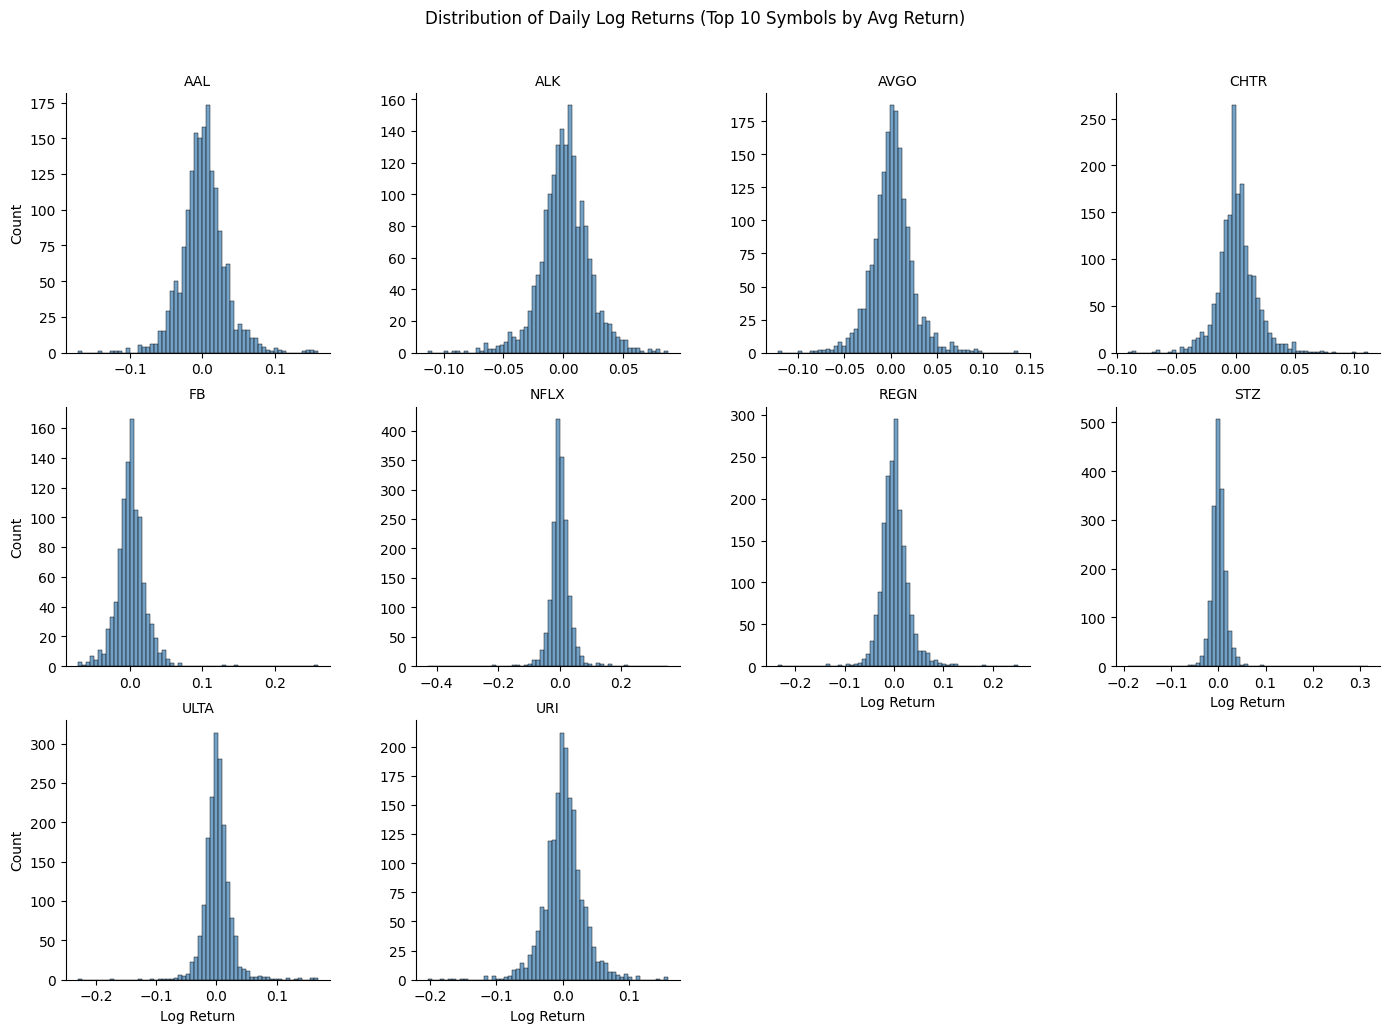

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find top 10 symbols with highest average daily log return
top_symbols = (
    df_scaled.groupby('symbol')['log_return_1d']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Print the top 10 symbols
print("Top 10 symbols with highest average daily log return:")
print(top_symbols.tolist())

# Filter the dataset to include only those symbols
subset = df_scaled[df_scaled['symbol'].isin(top_symbols)]

# Plot distribution of daily log returns for each symbol
g = sns.FacetGrid(subset, col="symbol", col_wrap=4, height=3.5, sharex=False, sharey=False)
g.map(sns.histplot, "log_return_1d", bins=60, color="steelblue")
g.set_titles("{col_name}")
g.set_axis_labels("Log Return", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Daily Log Returns (Top 10 Symbols by Avg Return)")
plt.show()


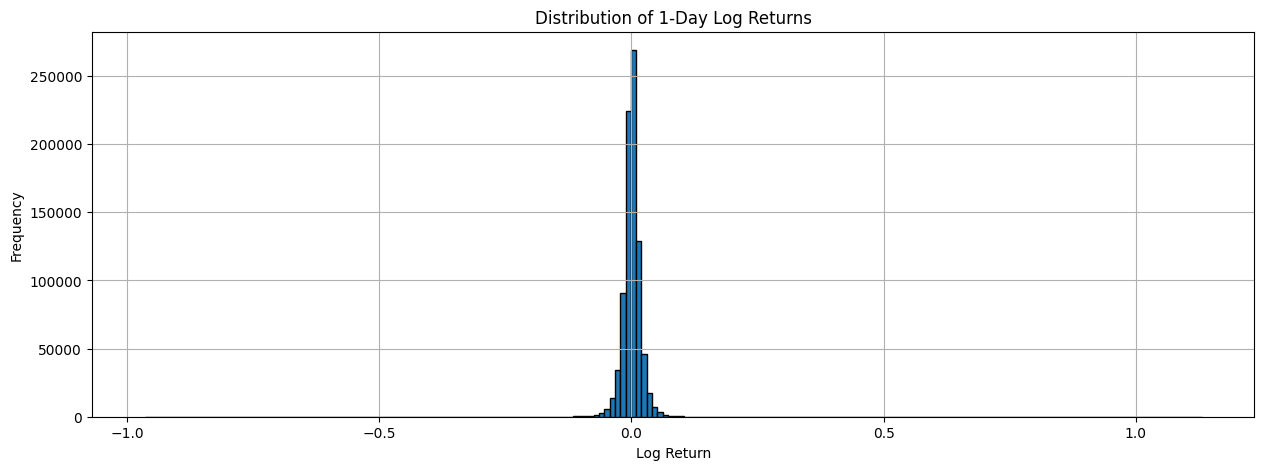

In [309]:
# Distribution of Daily Log Returns (Overall)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
df_scaled['log_return_1d'].hist(bins=200, edgecolor='black')
plt.title("Distribution of 1-Day Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()

## Checking skewness and kurtosis:




In [310]:
# Interpreting skewness and kurtosis

pricee_s_a['log_return_1d'].skew(), pricee_s_a['log_return_1d'].kurtosis()



(np.float64(-0.19728800513323905), np.float64(73.17536712698396))

#### Interpreting skewness and kurtosis is an important part of EDA. 
Skewness measures the asymmetry i.e. how much data contain extreme values (0 means normal distribution, negative means long tail on left side, positive means long tail on right side).

Kurtosis measures the "tailedness" i.e. how heavy or light the tails are compared to a normal distribution (3 means norml distribution, >3 means heavy tails or outliers, <3 means light tails or less extremem values).

Based on Skewness value "-0.197", data is slightly left-skewed, but very close to 0 so there is no strong bias towrds gain or losses.

Based on Kurtosis value "73.1", return distribution contain many extreme spikes/outliers where large jumps occur in financial data.

## Feature Correlation Matrix (comparing how each features relates to the others).

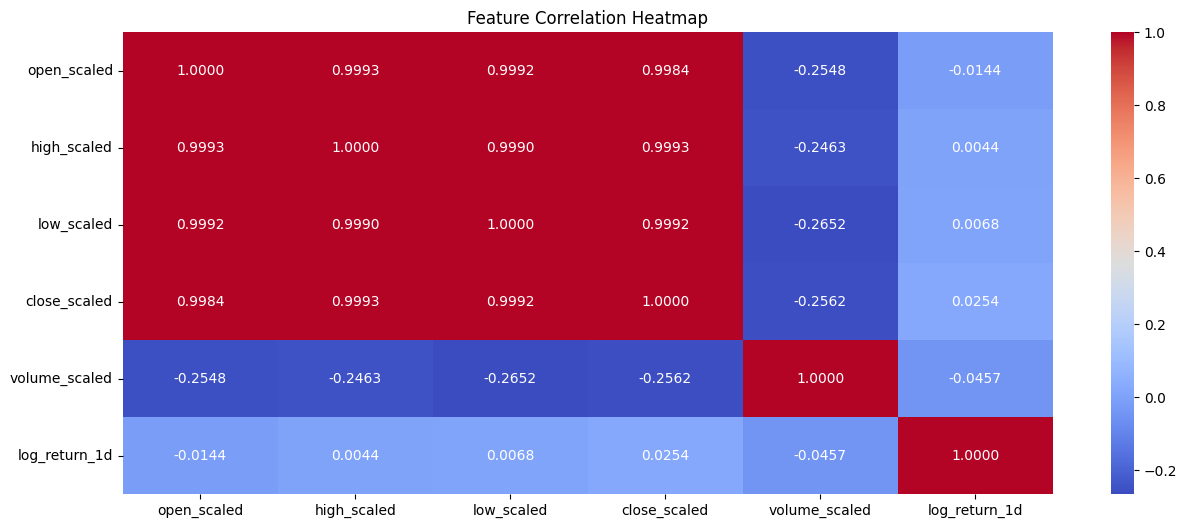

In [311]:
## Correlation Analysis

corr = df_scaled[['open_scaled', 'high_scaled', 'low_scaled', 'close_scaled', 'volume_scaled', 'log_return_1d']].corr()
import seaborn as sns

plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Feature Correlation Heatmap")
plt.show()


### Key observations:
Red (closer to 1): Strong positive correlation — when one feature increases, the other tends to increase. Applies to columns 'open', 'high', 'low', 'close'  that shows that price metrics move together during trading.

Blue (closer to -1): Strong negative correlation — when one feature increases, the other tends to decrease.

White or pale colors (around 0): Weak or no correlation. Applies to column 'volume' & 'log_return_1d' which has nearly no relation with other features.

## Pair Plot

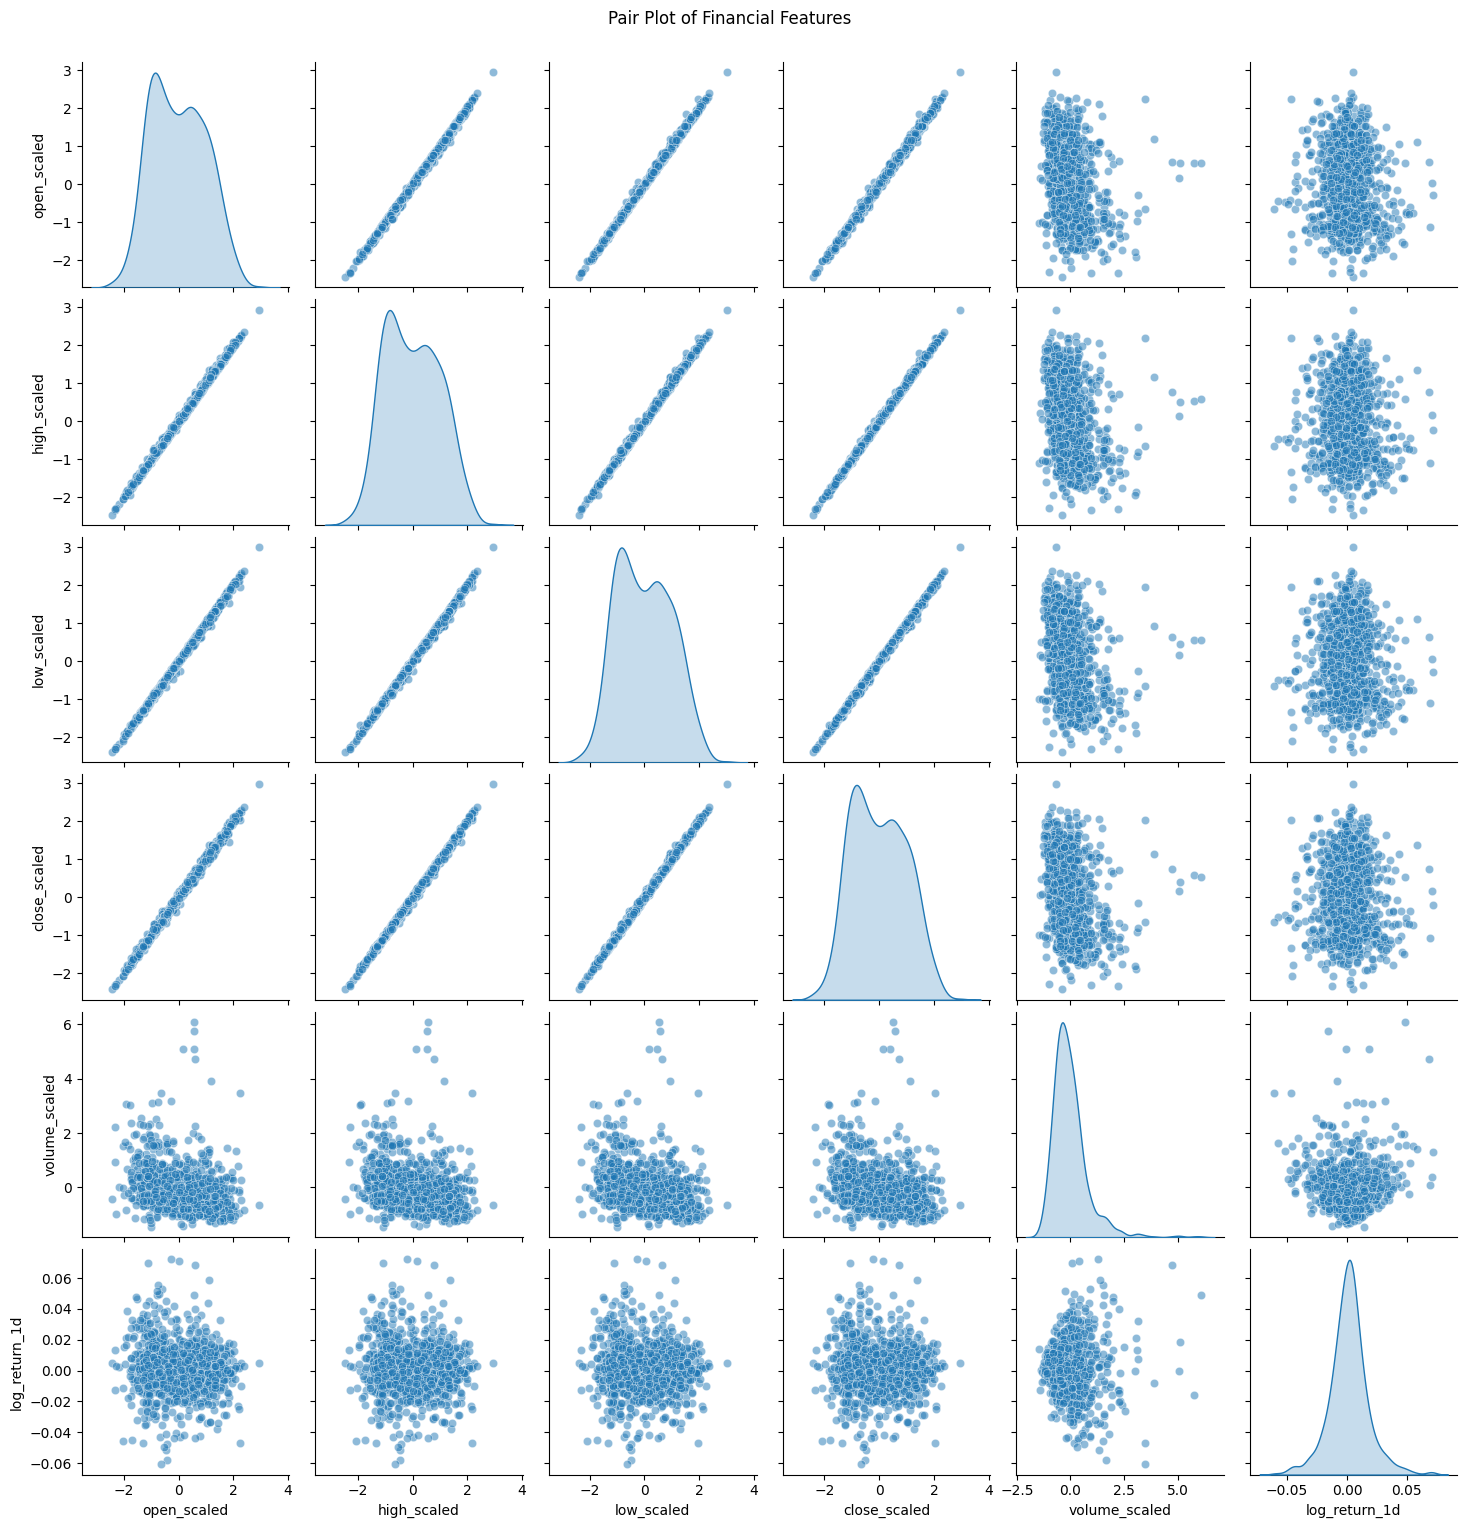

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric features
features = ['open_scaled', 'high_scaled', 'low_scaled', 'close_scaled', 'volume_scaled', 'log_return_1d']

# Optional: sample to reduce clutter if dataset is large
sampled_data = df_scaled[features].sample(n=1000, random_state=42)

# Create pair plot
sns.pairplot(sampled_data, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Financial Features", y=1.02)
plt.show()

### Key observations:

Above pair-plot is consistent with what we observed in the correlation matrics

## Single Time Series

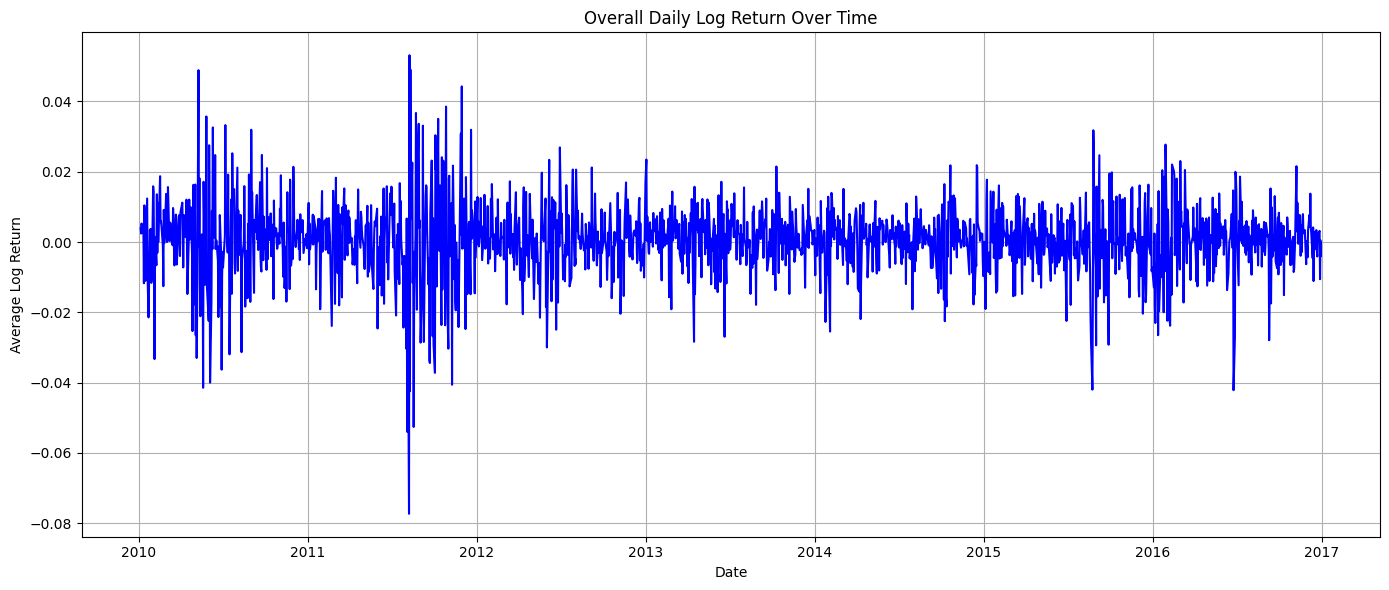

In [313]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'date' is datetime
df_scaled['date'] = pd.to_datetime(df_scaled['date'])

# Aggregate log return by date (mean across all symbols)
overall_log_return = df_scaled.groupby('date')['log_return_1d'].mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(overall_log_return.index, overall_log_return.values, color='blue')
plt.title('Overall Daily Log Return Over Time')
plt.xlabel('Date')
plt.ylabel('Average Log Return')
plt.grid(True)
plt.tight_layout()
plt.show()


### Key observations:

Average log return is close to zero most of the time, which is typical for daily returns.

Extreme drops (like below -0.06) indicate significant negative market events.

Spikes above 0.04 are strong positive days.

## Feature Engineering
Based on above, we observed that there is no direction relation between target variable (log_return_1d) and input features. This is because, we calculted the target column using current and previous day data while input features are given for the same day so "log_return_1d" is not related in any way. To overcome this, we need to perform feature engineering where we will add more columns to discover the correlation

In [314]:
# For each stock, get tomorrow’s log return as the target
df_scaled['target_next_day_return'] = df_scaled.groupby('symbol')['log_return_1d'].shift(-1)

# Create a binary classification label (target feature)
df_scaled['price_up_tomorrow'] = (df_scaled['target_next_day_return'] > 0).astype(int)


In [315]:
## clean up any NaNs that result from the .shift(-1) operation:
df_scaled = df_scaled.dropna(subset=['target_next_day_return'])

In [316]:
df_scaled

,date,symbol,log_return_1d,open_scaled,high_scaled,low_scaled,close_scaled,volume_scaled,close_lag1_scaled,target_next_day_return,price_up_tomorrow
0,2010-01-05,A,-0.010922,-1.580240,-1.624734,-1.576714,-1.606207,0.108336,-1.571683,-0.003559,0
1,2010-01-06,A,-0.003559,-1.614880,-1.645883,-1.576714,-1.616791,-0.286812,-1.604397,-0.001298,0
2,2010-01-07,A,-0.001298,-1.621616,-1.663186,-1.601739,-1.620640,-0.349126,-1.614980,-0.000325,0
3,2010-01-08,A,-0.000325,-1.635088,-1.660303,-1.611364,-1.621602,-0.081249,-1.618829,0.000649,1
4,2010-01-11,A,0.000649,-1.611994,-1.641076,-1.585377,-1.619677,0.358056,-1.619791,-0.012078,0
...,...,...,...,...,...,...,...,...,...,...,...
850757,2016-12-22,ZTS,0.002632,1.615670,1.643944,1.687717,1.692665,-0.752426,1.678898,0.009716,1
850758,2016-12-23,ZTS,0.009716,1.684114,1.696478,1.754204,1.759812,-0.620910,1.696991,-0.001116,0
850759,2016-12-27,ZTS,-0.001116,1.759014,1.743886,1.815477,1.752065,-0.805081,1.764193,-0.005226,0
850760,2016-12-28,ZTS,-0.005226,1.756431,1.705447,1.776367,1.715908,-0.836866,1.756439,0.003363,1


Adding momentum, ratio, and volatility features which are most effective ways to give our model predictive power in financial datasets.

These features capture price trends, relative movements, and market turbulence, which are all crucial for forecasting returns or directions like price_up_tomorrow.

In [317]:
# Calculate per-symbol features

df_scaled = df_scaled.copy() # use with a copy to suppress the warning

grouped = df_scaled.groupby('symbol', group_keys=False)

# Safe assignments using .loc
df_scaled.loc[:, 'momentum_3'] = grouped['close_scaled'].transform(lambda x: x / x.shift(3) - 1)
df_scaled.loc[:, 'momentum_5'] = grouped['close_scaled'].transform(lambda x: x / x.shift(5) - 1)
df_scaled.loc[:, 'momentum_10'] = grouped['close_scaled'].transform(lambda x: x / x.shift(10) - 1)

# Ratios (no need for groupby)
df_scaled.loc[:, 'close_open_ratio'] = df_scaled['close_scaled'] / df_scaled['open_scaled']
df_scaled.loc[:, 'high_low_ratio'] = df_scaled['high_scaled'] / df_scaled['low_scaled']
df_scaled.loc[:, 'volume_change'] = grouped['volume_scaled'].transform(lambda x: x / x.shift(1) - 1)

# Volatility
df_scaled.loc[:, 'volatility_3'] = grouped['log_return_1d'].transform(lambda x: x.rolling(3).std())
df_scaled.loc[:, 'volatility_5'] = grouped['log_return_1d'].transform(lambda x: x.rolling(5).std())
df_scaled.loc[:, 'volatility_10'] = grouped['log_return_1d'].transform(lambda x: x.rolling(10).std())



In [318]:
## Drop any NaN values generated by shifts

df_scaled = df_scaled.dropna(subset=['momentum_3', 'momentum_5','momentum_10'])


In [319]:
## Check there is no NaN values in the data set

df_scaled.isna().sum()

date                      0
symbol                    0
log_return_1d             0
open_scaled               0
high_scaled               0
low_scaled                0
close_scaled              0
volume_scaled             0
close_lag1_scaled         0
target_next_day_return    0
price_up_tomorrow         0
momentum_3                0
momentum_5                0
momentum_10               0
close_open_ratio          0
high_low_ratio            0
volume_change             0
volatility_3              0
volatility_5              0
volatility_10             0
dtype: int64

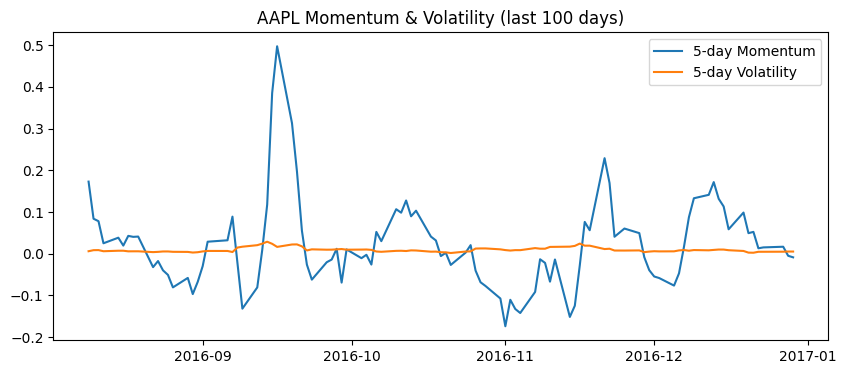

In [320]:
## Sanity check, visualize how one of these features behaves for a single symbol

import matplotlib.pyplot as plt

sym = 'AAPL'
subset = df_scaled[df_scaled['symbol'] == sym].tail(100)
plt.figure(figsize=(10,4))
plt.plot(subset['date'], subset['momentum_5'], label='5-day Momentum')
plt.plot(subset['date'], subset['volatility_5'], label='5-day Volatility')
plt.legend()
plt.title(f"{sym} Momentum & Volatility (last 100 days)")
plt.show()


Blue line: momentum_5 — how much the price changed over the last 5 days. Positive values mean the stock’s price increased over the last 5 days while negative values mean it dropped so this captures trend strength and direction.

Orange line: volatility_5 — how much the returns fluctuated over the last 5 days. This is mostly flat and close to zero meaning market is stable.

## Compute Pearson correlations including all key engineered features and target

In [321]:
# Correlations

# Select relevant columns
corr_features = [
    'momentum_3', 'momentum_5', 'momentum_10',
    'volatility_3', 'volatility_5', 'volatility_10',
    'close_open_ratio', 'high_low_ratio', 'volume_change',
    'price_up_tomorrow'
]

# Compute correlation matrix
corr_matrix = df_scaled[corr_features].corr()

target_corr = corr_matrix['price_up_tomorrow'].sort_values(ascending=False)
print(target_corr)



price_up_tomorrow    1.000000
volatility_3         0.002263
volatility_5         0.001755
high_low_ratio       0.001030
momentum_3           0.001012
volume_change        0.000352
close_open_ratio     0.000277
volatility_10       -0.000280
momentum_10         -0.000930
momentum_5          -0.001008
Name: price_up_tomorrow, dtype: float64


## Visualize the correlations (heatmap)

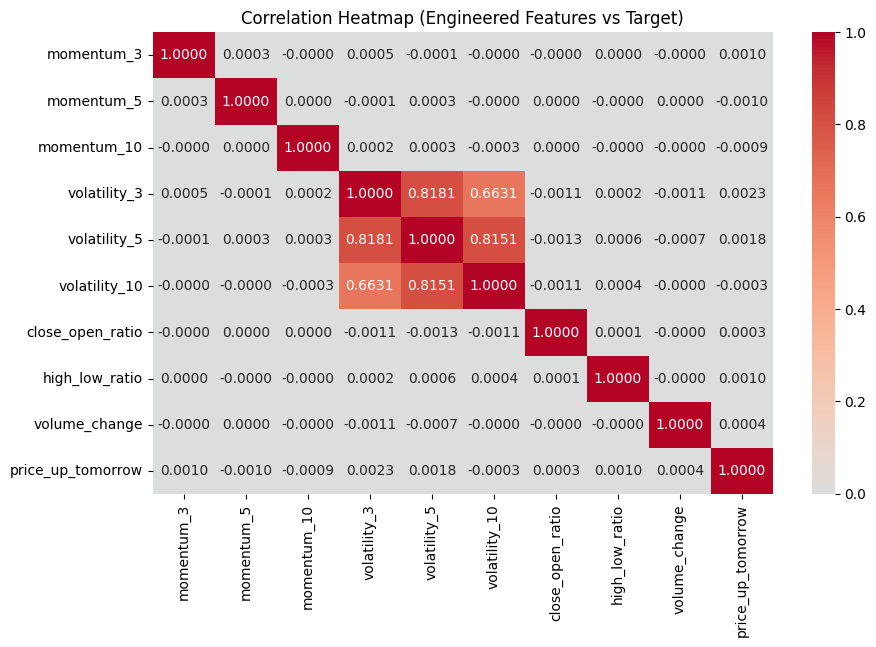

In [322]:
## Plot heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Engineered Features vs Target)")
plt.show()


### Key Observations

Based on above numbers, these tiny correlations (all near 0) mean there’s no strong linear relationship between any single feature (engineered) and target variable (tomorrow’s price direction).

However, it does NOT mean that our features are useless because financial markets are noisy and nonlinear so Machine Learning Models can still find nonlinear patterns that humans or simple correlation can’t.